<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/pca_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 12th October, 2022
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/datasets/oddrationale/mnist-in-csv?resource=download
# Ref: https://github.com/ranasingh-gkp/PCA-TSNE-on-MNIST-dataset/blob/master/14_15_16(PCA%2CT_SNE).ipynb
#      https://ryanwingate.com/intro-to-machine-learning/unsupervised/pca-on-mnist/


## Call libraries

In [84]:
# 1.0

import numpy as np
import pandas as pd

# 1.1
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

# 1.2
import matplotlib.pyplot as plt
import seaborn as sns

# 1.3
import os

In [51]:
# 1.4
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Mount gdrive

In [52]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Read Data

In [53]:
# 2.1 Path to Folder:

pathToFolder = "/gdrive/MyDrive/Colab_data_files/mnist"

In [54]:
# 2.2 Change current directory:

os.chdir(pathToFolder)
os.listdir()

['mnist_test.csv', 'mnist_train.csv']

In [80]:
# Read Data file:

df = pd.read_csv('mnist_train.csv')

In [81]:
# Look at the data:

df.head(5)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Shape and dtypes?

df.shape
df.dtypes

In [83]:
# Brief description:

df.describe()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [86]:
# Separate predictors from labels:

y = df.pop('label')
X = df

(60000, 784)

1x1      int64
1x2      int64
1x3      int64
1x4      int64
1x5      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 784, dtype: object

## Plot a digit

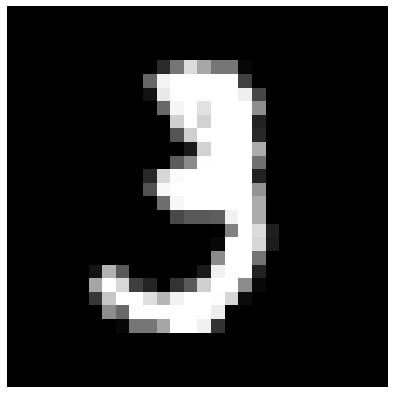



Label is:  3


In [95]:
# Plot digit
_=plt.figure(figsize=(10,7)) ;
idx = 10
data = df.iloc[idx,:].values.reshape(28,28)
_=plt.imshow(data, cmap = "gray");
_=plt.axis("off")
plt.show();

# Which label
print("\n=======\n")
print("Label is: ", y[idx])

In [97]:
# Standardize data:

ss= StandardScaler()
ss.fit(X)
X = ss.transform(X)

StandardScaler()

In [ ]:
# Instantiate PCA class with default parameters:

pca = decomposition.PCA()

In [99]:
# Fit and transform:
 
pca_data = pca.fit_transform(X)

In [101]:
# Shape of pca_data

pca_data.shape
print("\n==========\n")
pca_data[:2]


(60000, 2)

array([[-0.92213831, -4.81531091],
       [ 8.70898432, -7.75398996]])

In [63]:
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal"))

In [64]:
pcadf = pca_df.copy()

In [39]:
pca_df['labels'] = y

In [ ]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, y.values)).T

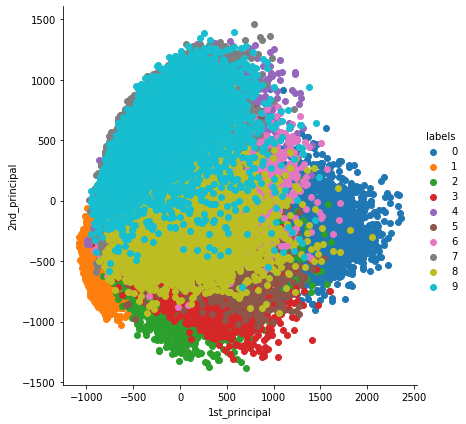

In [41]:
sns.FacetGrid(pca_df, hue="labels", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [44]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
percentage_var_explained

array([0.57763836, 0.42236164])

In [46]:
cum_var_explained = np.cumsum(percentage_var_explained)
cum_var_explained

array([0.57763836, 1.        ])

In [ ]:
cum_var_explained

<Figure size 432x288 with 0 Axes>

(-39.150000000000006, 822.15, 0.05189897577699616, 1.0451476678201423)

Text(0.5, 0, 'n_components')

Text(0, 0.5, 'Cumulative_explained_variance')

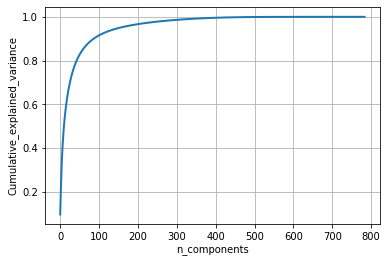

In [49]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(X)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


In [67]:
X_train, X_test, y_train, y_test = train_test_split(pcadf, y, 
                                                        test_size=0.33, 
                                                        random_state=42)

In [70]:
clf = RandomForestClassifier(n_estimators=500, max_depth=None)

In [71]:
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500)

In [74]:
y_preds = clf.predict(X_test)

In [76]:
acc = accuracy_score(y_test, y_preds)
acc

0.4168686868686869

In [79]:
confusion_matrix(y_test, y_preds)

array([[1351,    0,  128,   43,    7,  102,  234,    3,   68,   10],
       [   0, 2017,   33,   26,    9,   34,   23,   17,   45,   14],
       [ 173,   53,  506,  329,   48,  219,  247,   28,  308,   30],
       [  64,   42,  292,  886,   21,  210,  160,   22,  308,   30],
       [   7,   26,   25,   12,  697,   59,   75,  391,   44,  582],
       [ 163,   49,  233,  257,   75,  339,  320,   45,  284,   34],
       [ 208,   34,  245,  155,   90,  285,  556,   38,  325,   44],
       [   2,   59,   32,   18,  473,   56,   58,  840,   33,  550],
       [ 105,   51,  260,  294,   45,  261,  343,   30,  466,   39],
       [  16,   28,   21,   20,  593,   51,   59,  533,   31,  596]])